In [ ]:
!pip install -U -q PyDrive
!pip install pandas
!pip install pandas-profiling
!pip install tabulate
!pip install pandas-profiling[notebook]

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'1zezSUHih7qOiqSFA6o17AtA_e2tnBp7O' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Tesis_regresion_p2.ipynb, id: 1iwB-QnlcXvRCqVTWmWL8I-p2_PvxL865
title: Analisis_geografico.ipynb, id: 1QHwfgByA_PH29326znPH31kEA_EEOZrU
title: Datos_geograficos_Rstidio.xlsx, id: 136woFLl5H7uf17IFqciILtHqjEJeT-X9
title: colombia-municipios.json, id: 1yiyc692-YlFz13FxHENCgDUX_RX8bRUM
title: datos_regresion_poscovid.csv, id: 1cVRkcIC29xTcJ6rtqpkkm1V6ue4pX4Ai
title: datos_regresion_precovid.csv, id: 1qQu8qJ00bPXx7SOgwnDMZP1hl505nbq5


In [ ]:
train_downloaded = drive.CreateFile({'id': '1qQu8qJ00bPXx7SOgwnDMZP1hl505nbq5'})
train_downloaded.GetContentFile('datos_regresion_precovid.csv')

train_downloaded2 = drive.CreateFile({'id': '1cVRkcIC29xTcJ6rtqpkkm1V6ue4pX4Ai'})
train_downloaded2.GetContentFile('datos_regresion_poscovid.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor

In [ ]:
datos=pd.read_csv('datos_regresion_precovid.csv')
datos_pos_covid=pd.read_csv('datos_regresion_poscovid.csv')
datos
#datos.head()

,COLE_AREA_UBICACION,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,FAMI_EDUCACIONMADRE_Postgrado,ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas,ESTU_DEDICACIONINTERNET_Más de 3 horas,ESTU_DEDICACIONINTERNET_No Navega Internet,FAMI_EDUCACIONMADRE_Educación profesional completa,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Postgrado,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_PERSONASHOGAR_3 a 4,FAMI_PERSONASHOGAR_9 o más,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENEINTERNET_No,PUNT_GLOBAL,ANO
0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,278,2017
1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,287,2017
2,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,244,2017
3,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,187,2017
4,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,232,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642402,0,0,3.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,343,2019
1642403,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,252,2019
1642404,0,0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,280,2019
1642405,0,0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,360,2019


In [ ]:
datos.drop('ANO', inplace=True, axis=1)

In [ ]:
y=datos['PUNT_GLOBAL']
datos.drop('PUNT_GLOBAL', inplace=True, axis=1)
X=datos

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
#poly_reg2=PolynomialFeatures(degree=2)
#X_poly=poly_reg2.fit_transform(X_train)
#lin_reg_2=LinearRegression()
#lin_reg_2.fit(X_poly,y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor_4 = DecisionTreeRegressor(max_depth=4)
tree_regressor_10 = DecisionTreeRegressor(max_depth=10)
tree_regressor_15 = DecisionTreeRegressor(max_depth=15)
tree_regressor_20 = DecisionTreeRegressor(max_depth=20)

In [ ]:
tree_regressor_4.fit(X_train, y_train)
tree_regressor_10.fit(X_train, y_train)
tree_regressor_15.fit(X_train, y_train)
tree_regressor_20.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import mean_squared_error

pred = tree_regressor_4.predict(X_test)
mean_squared_error(pred, y_test)

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

pred = tree_regressor_10.predict(X_test)
mean_squared_error(pred, y_test)

NameError: ignored

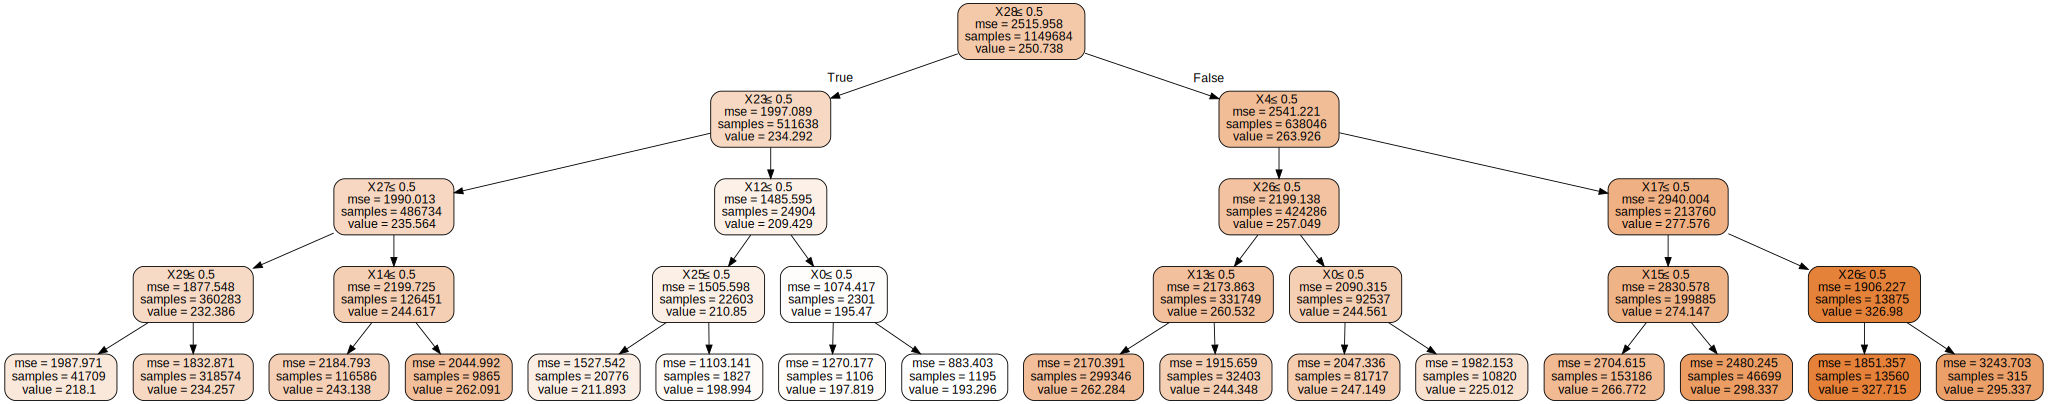

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_regressor_4, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [ ]:
tree_regressor_50 = DecisionTreeRegressor(max_depth=50)
tree_regressor_50.fit(X_train, y_train)
pred = tree_regressor_50.predict(X_test)
mean_squared_error(pred, y_test)

1968.4249095590098

In [ ]:
#degree=9
##polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
#polyreg.fit(X_train, y_train)
#print('Polinomial 4: {}'.format(mean_squared_error(polyreg.predict(X_test), y_test)))

In [ ]:
poly = PolynomialFeatures(degree = 2)
#X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
lin3 = LinearRegression()
lin3.fit(X_train, y_train)
print('Polinomial 4: {}'.format(mean_squared_error(lin3.predict(X_test), y_test)))

Polinomial 4: 1959.6682552331404


In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4)
#X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Polinomial 4: {}'.format(mean_squared_error(lin2.predict(X_test), y_test)))

Polinomial 4: 1959.6682552331404


In [ ]:
poly = PolynomialFeatures(degree = 8)
#X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_train, y_train)
print('Polinomial 4: {}'.format(mean_squared_error(lin2.predict(X_test), y_test)))

Polinomial 4: 1959.6682552331404


In [ ]:
#poly = PolynomialFeatures(degree = 16)
#X_poly = poly.fit_transform(X_train)
#poly.fit(X_train, y_train)
#lin2 = LinearRegression()
#lin2.fit(X_train, y_train)
#print('Polinomial 4: {}'.format(mean_squared_error(lin2.predict(X_test), y_test)))

In [ ]:
mlp_regressor_simple = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,30,30), random_state=1)

mlp_regressor_complex = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(28,52,12), random_state=1)

mlp_regressor_complex2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)

mlp_regressor_complex3 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,60,30), random_state=1)

mlp_regressor_complex4 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,60,60,30), random_state=1)

In [ ]:
mlp_regressor_complex2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_complex2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
mlp_regressor_simple.fit(X_train, y_train)
mlp_regressor_complex.fit(X_train, y_train)
mlp_regressor_complex2.fit(X_train, y_train)
mlp_regressor_complex3.fit(X_train, y_train)
mlp_regressor_complex4.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 60, 60, 30), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple.predict(X_test), y_test)))
print('MSE MLP dos capas: {}'.format(mean_squared_error(mlp_regressor_complex.predict(X_test), y_test)))
print('MSE MLP multiples capas: {}'.format(mean_squared_error(mlp_regressor_complex2.predict(X_test), y_test)))
print('MSE MLP multiples capas: {}'.format(mean_squared_error(mlp_regressor_complex3.predict(X_test), y_test)))
print('MSE MLP multiples capas: {}'.format(mean_squared_error(mlp_regressor_complex4.predict(X_test), y_test)))

MSE MLP una capa: 1891.4755847484362
MSE MLP dos capas: 1889.4740698494647
MSE MLP multiples capas: 1887.9209572108896
MSE MLP multiples capas: 1889.8443516740272
MSE MLP multiples capas: 1889.578978308276


In [ ]:
mlp_regressor_simple2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='tanh',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_simple2.fit(X_train, y_train)
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple2.predict(X_test), y_test)))
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

MSE MLP una capa: 2508.438331475843


In [ ]:
mlp_regressor_simple2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='logistic',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_simple2.fit(X_train, y_train)
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple2.predict(X_test), y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MSE MLP una capa: 1890.6163554383807


In [ ]:
mlp_regressor_simple2 = MLPRegressor(solver='lbfgs', alpha=1e-5, activation='identity',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_simple2.fit(X_train, y_train)
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple2.predict(X_test), y_test)))

MSE MLP una capa: 1959.6690361257188


In [ ]:
mlp_regressor_simple2 = MLPRegressor(solver='sgd', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_simple2.fit(X_train, y_train)
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple2.predict(X_test), y_test)))
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ValueError: ignored

In [ ]:
mlp_regressor_simple2 = MLPRegressor(solver='adam', alpha=1e-5, activation='relu',
                                       hidden_layer_sizes=(30,30,30,30,30), random_state=1)
mlp_regressor_simple2.fit(X_train, y_train)
print('MSE MLP una capa: {}'.format(mean_squared_error(mlp_regressor_simple2.predict(X_test), y_test)))
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

MSE MLP una capa: 1884.8270977996322


In [ ]:
mlp_regressor_simple.predict(X_test)

In [ ]:
y_test

873505     272
1361139    264
584835     193
1325558    171
1514213    260
          ... 
1213597    261
84167      342
416747     320
1469110    261
492561     324
Name: PUNT_GLOBAL, Length: 492723, dtype: int64

In [ ]:
variable1=np.array(y_test)
variable= pd.DataFrame(variable1,columns=['Datos_Y'])
variable['Prediccion']= round(pd.DataFrame(mlp_regressor_complex2.predict(X_test)),0)
variable

,Datos_Y,Prediccion
0,272,268.0
1,264,256.0
2,193,238.0
3,171,202.0
4,260,249.0
...,...,...
492718,261,272.0
492719,342,304.0
492720,320,247.0
492721,261,234.0


In [ ]:
datos_pos_covid.drop('ANO', inplace=True, axis=1)
y_post_covid=datos_pos_covid['PUNT_GLOBAL']
datos_pos_covid.drop('PUNT_GLOBAL', inplace=True, axis=1)
X_post_covid=datos_pos_covid

KeyError: ignored

In [ ]:
print('MSE MLP dos capas: {}'.format(mean_squared_error(mlp_regressor_complex2.predict(X_post_covid), y_post_covid)))

MSE MLP dos capas: 1808.137748805249


In [ ]:
variable2=np.array(y_post_covid)
variable5= pd.DataFrame(variable2,columns=['Datos_Y'])
variable5['Prediccion']= round(pd.DataFrame(mlp_regressor_complex2.predict(X_post_covid)),0)
variable5

,Datos_Y,Prediccion
0,261,283.0
1,306,332.0
2,321,248.0
3,338,322.0
4,225,235.0
...,...,...
504867,234,258.0
504868,198,240.0
504869,164,237.0
504870,173,238.0


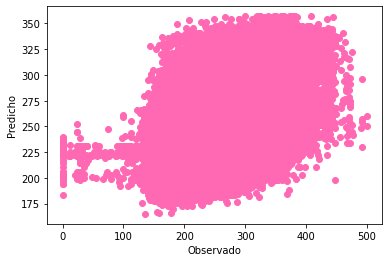

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(variable5['Datos_Y'], variable5['Prediccion'], color = 'hotpink')
plt.xlabel("Observado")
plt.ylabel("Predicho");